In [1]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import Lasso, LogisticRegression, RidgeClassifier, Ridge
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, BorderlineSMOTE, SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
#import xgboost as xgb

In [2]:
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [3]:
df = pd.read_csv('data/bank_data_train.csv')

In [4]:
df.describe()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,PRC_ACCEPTS_A_AMOBILE,SUM_TRAN_AUT_TENDENCY3M,PRC_ACCEPTS_TK,PRC_ACCEPTS_A_MTP,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,CNT_ACCEPTS_TK,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,PRC_ACCEPTS_A_ATM,PRC_ACCEPTS_MTP,TRANS_COUNT_NAS_PRC,CNT_ACCEPTS_MTP,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,355190.000000,355190.000000,316867.000000,155163.0,60550.000000,155163.0,155163.0,355190.000000,77112.000000,77112.000000,316867.000000,155163.0,111052.000000,155163.0,155163.0,355190.000000,111052.000000,155163.0,355190.000000,355190.000000,3.551900e+05,68967.000000,316867.000000,316867.000000,66296.000000,68967.000000,155163.0,155163.0,316867.000000,155163.0,355190.000000,355190.000000,6.629600e+04,3.551900e+05,316867.000000,316867.000000,3.551900e+05,355190.000000,115877.000000,355190.000000,115877.000000,355190.000000,355190.000000,114898.000000,8001.000000,1.241000e+03,355190.000000,8001.000000,1.240000e+03,8001.000000,114898.000000,355190.000000,3.551900e+05,8001.000000,1.888000e+03,355190.000000,355190.000000,198718.000000,355190.000000,355190.000000,198718.000000,355190.000000,255595.000000,205874.000000,355190.000000,255595.000000,70449.000000,1628.000000,95713.000000,155995.000000,95713.000000,205874.000000,355190.000000,155995.000000,69433.000000,355190.000000,1881.000000,2.808000e+03,355190.000000,69433.000000,355190.000000,8001.000000,355190.000000,712.000000,303194.000000,8001.000000,303194.000000,8001.000000,355190.000000,95713.000000,355190.000000,1888.000000,93448.000000,355190.000000,95713.000000,93448.000000,98175.000000,95713.000000,355190.000000,93448.000000,93448.000000,93448.000000,355190.000000
mean,368794.674875,0.105225,0.044045,0.0,50.947498,0.0,0.0,0.001305,0.416896,0.414572,0.085249,0.0,0.689080,0.0,0.0,0.000723,0.691702,0.0,0.063400,0.031214,6.635854e+04,0.443912,0.023971,0.191057,0.479829,0.437471,0.0,0.0,0.050886,0.0,0.309930,0.056863,4.729494e-01,4.963772e+02,0.370588,0.598252,1.446766e+04,457.148073,0.700676,0.071531,0.696133,0.003942,0.001648,0.697152,22.366329,5.201209e-03,0.004944,26.303878,7.236572e-02,25.594477,0.699966,0.212339,7.108816e+03,15.799525,1.943955e+05,0.001809,0.498813,0.642714,0.204254,0.076570,0.627334,0.005650,0.628063,0.327222,0.003976,0.617506,0

In [5]:
cols_to_log = ['REST_AVG_CUR', 'TURNOVER_CC', 'TURNOVER_PAYM', 'REST_AVG_PAYM', 'LDEAL_AMT_MONTH', 'CLNT_SALARY_VALUE']
df[cols_to_log].describe()
for i in cols_to_log:
    df[i] = df[i].apply(lambda x: np.log(x + 1))
df[cols_to_log].describe()

,REST_AVG_CUR,TURNOVER_CC,TURNOVER_PAYM,REST_AVG_PAYM,LDEAL_AMT_MONTH,CLNT_SALARY_VALUE
count,355190.000000,355190.000000,355190.000000,355190.000000,1888.000000,712.000000
mean,8.815348,0.107754,1.464377,1.416785,6.248778,9.904257
std,3.568676,0.974548,3.653677,3.448320,6.050079,1.178738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.559616
25%,8.311752,0.000000,0.000000,0.000000,0.000000,9.228152
50%,9.698322,0.000000,0.000000,0.000000,9.065769,9.872890
75%,10.943696,0.000000,0.000000,0.000000,12.091292,10.577336
max,16.907526,15.138078,17.650230,15.573127,15.534635,13.096637


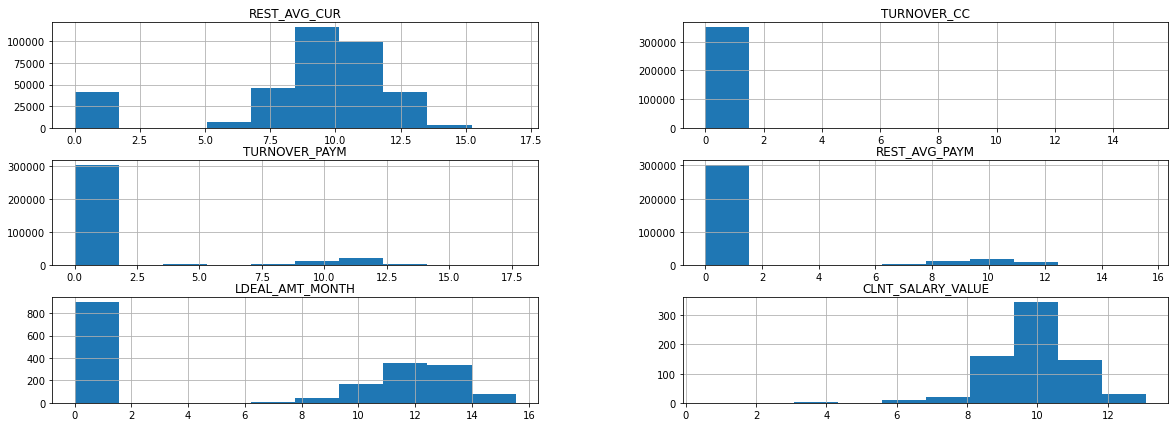

In [6]:
df[cols_to_log].hist(figsize=(20,7));

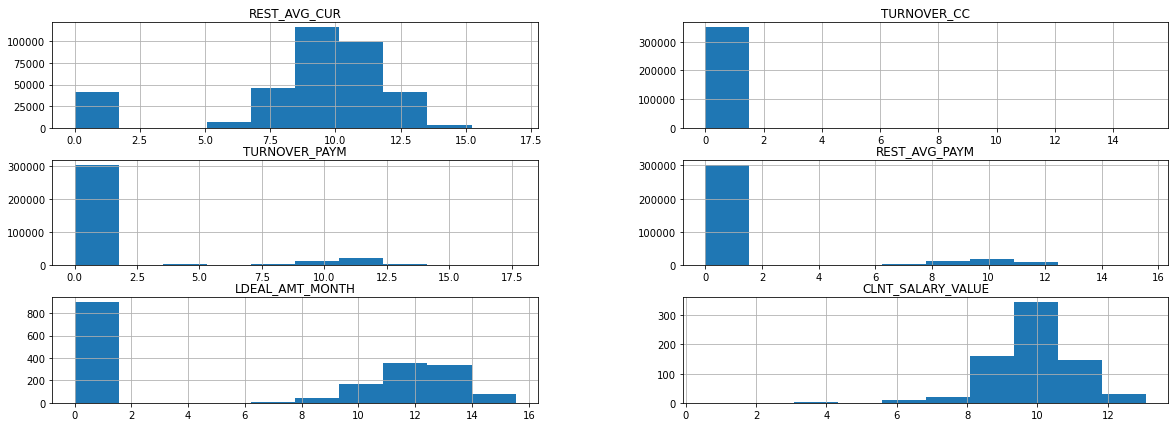

In [7]:
df[cols_to_log].hist(figsize=(20,7));

In [8]:
df.set_index('ID', inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,PRC_ACCEPTS_A_AMOBILE,SUM_TRAN_AUT_TENDENCY3M,CLNT_TRUST_RELATION,PRC_ACCEPTS_TK,PRC_ACCEPTS_A_MTP,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,CNT_ACCEPTS_TK,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,PRC_ACCEPTS_A_ATM,PRC_ACCEPTS_MTP,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS,CNT_ACCEPTS_MTP,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,APP_EMP_TYPE,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.541683,0,11.958049,NaN,NaN,NaN,0.0,начальник отдела,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,0,NaN,NaN,0.0,1.000000,1.000000,0.0,660,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.134651,0.0,NaN,NaN,NaN,0.0,0.474134,NaN,0.131910,0.0,NaN,0.0,0.406780,0.101695,0.0,0.483032,NaN,NaN,NaN,NaN,NaN,0.134634,0.0,NaN,NaN,0.442285,K01,NaN,NaN,1.593023,NaN,0.0,NaN,0.0,NaN,0.483032,NaN,0.406780,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,0.244678,NaN,0.670968,NaN,NaN,NaN,0.0,0.666667,NaN,NaN,0.000000,0,8.361672,NaN,NaN,NaN,0.0,NaN,NaN,0.454545,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,0,NaN,NaN,0.0,0.109091,0.410691,0.0,552,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.239365,0.0,NaN,NaN,NaN,0.0,0.384264,0.6,0.101934,0.0,0.510712,0.0,0.333333,0.166667,0.0,0.200000,NaN,NaN,NaN,0.309799,NaN,0.133333,0.0,0.24,NaN,0.515876,102,NaN,NaN,1.587647,NaN,0.0,NaN,0.0,NaN,0.394340,NaN,0.545455,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.000000,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.000000,0,11.633709,NaN,NaN,NaN,0.0,ГЕНЕРАЛЬНЫЙ ДИРЕКТОР,NaN,0.000000,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0,NaN,0,NaN,NaN,0.0,0.810811,0.925140,0.0,420,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.084341,0.0,NaN,NaN,NaN,0.0,0.336136,NaN,0.121041,0.0,NaN,0.0,0.366667,0.133333,0.0,0.431656,NaN,NaN,NaN,NaN,NaN,0.063129,0.0,NaN,NaN,0.522833,102,NaN,NaN,1.587647,NaN,0.0,NaN,0.0,NaN,0

In [9]:
binary = ['CNT_ACCEPTS_TK', 'PRC_ACCEPTS_A_MTP', 'PRC_ACCEPTS_A_AMOBILE', 'PRC_ACCEPTS_A_ATM', 'PRC_ACCEPTS_A_TK', 
          'PRC_ACCEPTS_A_EMAIL_LINK', 'PRC_ACCEPTS_MTP', 'PRC_ACCEPTS_A_POS', 'CNT_ACCEPTS_MTP']#, 'PRC_ACCEPTS_TK']
df['PRC_ACCEPTS_TK'] = df['PRC_ACCEPTS_TK'].fillna(1).astype(int)
df.drop(binary, axis=1, inplace=True)

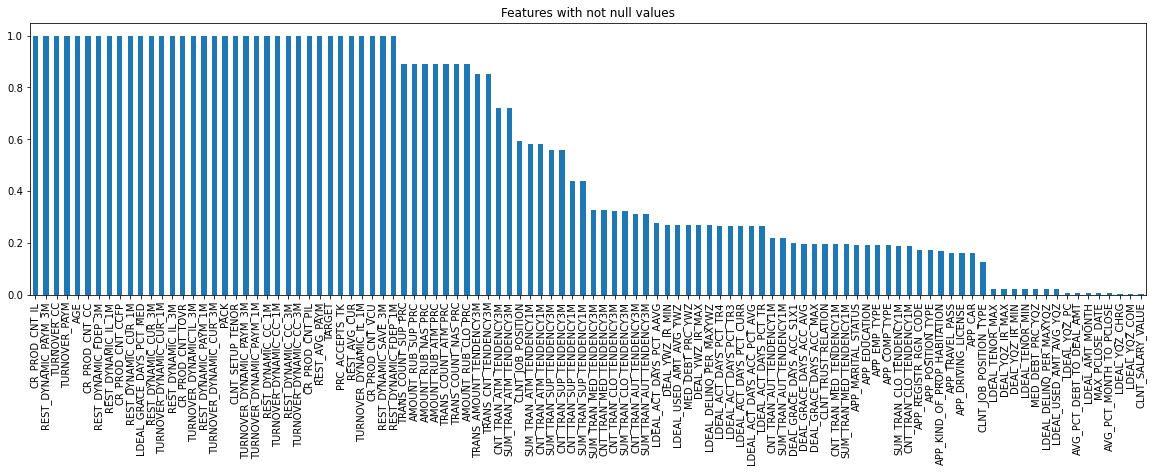

In [10]:
df_not_null = df.notnull().sum().div(len(df)).sort_values(0, ascending=False)
df_not_null.plot(kind='bar', figsize=(20,5), title='Features with not null values');

In [11]:
#df_not_null = pd.DataFrame(df_not_null, columns=['not_null'])
#features_drop = list(df_not_null[df_not_null['not_null'] < 0.1].index)
#df.drop(features_drop, axis=1, inplace=True)
#df.fillna(df.mean(), inplace=True)

In [12]:
to_int = ['APP_REGISTR_RGN_CODE']
df[to_int] = df[to_int].fillna(-1).astype(int)

In [13]:
category = ['APP_CAR', 'CLNT_JOB_POSITION_TYPE', 'APP_EMP_TYPE', 'APP_TRAVEL_PASS', 'APP_KIND_OF_PROP_HABITATION', 
            'APP_DRIVING_LICENSE', 'APP_POSITION_TYPE', 'APP_MARITAL_STATUS', 'APP_EDUCATION', 'CLNT_JOB_POSITION', 
            'CLNT_TRUST_RELATION', 'APP_REGISTR_RGN_CODE', 'APP_COMP_TYPE', 'PACK', 'TARGET']
df[category] = df[category].astype(str).fillna('NULL')
relations = {'мать': 'mother', 'отец': 'father', 'сын': 'son', 'сестра': 'sister', 'брат': 'brother', 'дочь': 'daughter',
             'друг': 'friend', 'жена': 'relative', 'муж': 'relative', 'близкий ро': 'relative', 'дальний ро': 'other'}

df['CLNT_TRUST_RELATION'] = df['CLNT_TRUST_RELATION'].apply(lambda x: x.lower())
df['CLNT_TRUST_RELATION'] = df['CLNT_TRUST_RELATION'].replace(relations)
for i in df[category]:
    df[i] = df[i].str.upper()
#df.drop(, axis=1, inplace=True) ######## drop job

In [14]:
job_list = {'ЗАМЕСТИТЕЛЬ': 'ЗАМ. ', 'ЗАМ ': 'ЗАМ. ', 'ГЕНЕРАЛЬНЫЙ': 'ГЕН. ', 'ГЕНЕРАЛЬНОГО': 'ГЕН. ', 'ГЕН ': 'ГЕН. ', 
       'ПРОГРАМИСТ': 'ПРОГРАММИСТ', 'ГЛ.': 'ГЛАВНЫЙ ', 'КОМЕРЧЕСКИЙ': 'КОМ.', 'КОММЕРЧЕСКИЙ': 'КОМ.', 
       'ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ': 'ИП'}

def replace_job(job):
    for k, v in job_list.items():
        job = job.replace(k, v)
    return job

In [15]:
df['CLNT_JOB_POSITION'] = df['CLNT_JOB_POSITION'].apply(lambda x: replace_job(x))
df['CLNT_JOB_POSITION'] = df['CLNT_JOB_POSITION'].apply(lambda x: re.sub(r'\s+', ' ', str(x).replace('.', '. ')).strip())

In [16]:
top = df['CLNT_JOB_POSITION'].value_counts().reset_index().head(100)['index'].values
df['CLNT_JOB_POSITION'] = df['CLNT_JOB_POSITION'].apply(lambda x: x if x in top else "ПРОЧЕЕ").value_counts()

In [17]:
cnt_prod = ['CR_PROD_CNT_CC','CR_PROD_CNT_CCFP','CR_PROD_CNT_IL','CR_PROD_CNT_PIL','CR_PROD_CNT_TOVR','CR_PROD_CNT_VCU']

In [18]:
df.shape

(355082, 106)

df.drop(corr_features, axis=1, inplace=True, errors='ignore')

<AxesSubplot:>

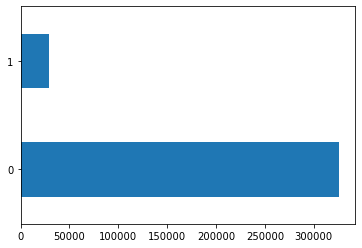

In [19]:
df['TARGET'].value_counts().plot(kind='barh')

In [20]:
na_avg = ['DEAL_YQZ_IR_MAX', 'DEAL_YQZ_IR_MIN', 'DEAL_YWZ_IR_MAX', 'DEAL_YWZ_IR_MIN']

In [21]:
%%time
for i in df.columns:
    #df[i] = df[i].astype(np.float32)
    if df[i].isnull().any():
        if str(df[i].values.dtype) == 'float64':
            if i in na_avg:
                df[i].fillna(df[i].median(), inplace=True)
            else:
                 df[i].fillna(0, inplace=True)
                #df['ZERO_' + i] = df[i].fillna(0)
        else:
            print(i)
        #df.drop(i, axis=1, inplace=True)

Wall time: 336 ms


In [22]:
with_null = pd.DataFrame(df.isnull().any(), columns={'null'})

In [23]:
col = sorted(with_null[with_null['null']].index)

In [24]:
df[col].min()

Series([], dtype: float64)

In [25]:
set(df[col].min().index)

set()

In [26]:
df.describe()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,SUM_TRAN_AUT_TENDENCY3M,PRC_ACCEPTS_TK,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,TRANS_COUNT_SUP_PRC,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,TRANS_COUNT_NAS_PRC,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR
count,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.0,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.00000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000,355082.000000
mean,0.105221,0.039305,0.001306,0.090536,0.090031,0.076074,0.215510,0.563033,0.000723,0.216330,0.063418,0.031224,8.815648,0.086220,0.021391,0.0,0.170495,0.089587,0.084969,0.045410,0.310019,0.056860,0.088303,0.107787,0.330690,0.533852,1.464822,457.138250,0.228658,0.071541,0.227175,0.003944,0.001647,0.225586,0.503977,0.000018,0.004945,23.074446,0.000253,23.048686,0.226496,0.212344,1.416475,0.356008,0.033225,0.001810,0.498838,0.359688,0.204291,0.076548,0.351081,0.005646,0.452078,0.189710,0.003977,0.444479,0.005713,-0.012258,42.898818,0.144025,43.517110,0.186811,0.027677,0.149660,0.004785,0.484944,-0.112945,0.000190,4.376801,0.005716,0.071928,0.004407,0.025116,0.019860,0.497141,0.020747,0.509957,0.009736,0.00219,0.242861,0.000883,0.001713,0.013526,0.007307,0.014840,0.006760,0.013803,0.002488,0.004310,0.003662,0.003662,0.00

In [27]:
not_imp = ['AMOUNT_RUB_CLO_PRC', 'AMOUNT_RUB_SUP_PRC', 'APP_CAR', 'APP_COMP_TYPE', 'APP_EDUCATION', 'APP_EMP_TYPE', 
           'APP_KIND_OF_PROP_HABITATION', 'APP_MARITAL_STATUS', 'APP_POSITION_TYPE', 'APP_REGISTR_RGN_CODE', 
           'APP_TRAVEL_PASS',  'AVG_PCT_MONTH_TO_PCLOSE', 'CLNT_JOB_POSITION_TYPE', 'CLNT_JOB_POSITION',
           'CLNT_SALARY_VALUE', 'CLNT_SETUP_TENOR', 'CLNT_TRUST_RELATION', 'CNT_TRAN_ATM_TENDENCY1M', 
           'CNT_TRAN_ATM_TENDENCY3M', 'CNT_TRAN_AUT_TENDENCY1M', 'CNT_TRAN_AUT_TENDENCY3M',
            'CNT_TRAN_MED_TENDENCY1M', 'CNT_TRAN_MED_TENDENCY3M', 'CNT_TRAN_SUP_TENDENCY1M',
           'CNT_TRAN_SUP_TENDENCY3M', 'CR_PROD_CNT_CC', 'CR_PROD_CNT_IL', 'CR_PROD_CNT_PIL', 'CR_PROD_CNT_TOVR',
           'CR_PROD_CNT_VCU', 'DEAL_GRACE_DAYS_ACC_AVG', 'DEAL_GRACE_DAYS_ACC_MAX', 'DEAL_GRACE_DAYS_ACC_S1X1', 
           'DEAL_YQZ_IR_MAX', 'DEAL_YQZ_IR_MIN',
 'DEAL_YWZ_IR_MIN',
 'LDEAL_ACT_DAYS_ACC_PCT_AVG',
 'LDEAL_ACT_DAYS_PCT_CURR',
 'LDEAL_ACT_DAYS_PCT_TR',
 'LDEAL_ACT_DAYS_PCT_TR3',
 'LDEAL_AMT_MONTH',
 'LDEAL_DELINQ_PER_MAXYQZ',
 'LDEAL_DELINQ_PER_MAXYWZ',
 'LDEAL_GRACE_DAYS_PCT_MED',
 'LDEAL_TENOR_MAX',
 'LDEAL_TENOR_MIN',
 'LDEAL_USED_AMT_AVG_YQZ',
 'LDEAL_USED_AMT_AVG_YWZ',
 'LDEAL_YQZ_CHRG',
 'LDEAL_YQZ_COM',
 'LDEAL_YQZ_PC',
 'MAX_PCLOSE_DATE',
 'MED_DEBT_PRC_YQZ',
 'MED_DEBT_PRC_YWZ',
 'PRC_ACCEPTS_TK',
 'REST_DYNAMIC_CC_1M',
 'REST_DYNAMIC_CUR_3M',
 'REST_DYNAMIC_FDEP_1M',
 'REST_DYNAMIC_FDEP_3M',
 'REST_DYNAMIC_IL_3M',
 'REST_DYNAMIC_PAYM_3M',
 'SUM_TRAN_ATM_TENDENCY3M',
 'SUM_TRAN_AUT_TENDENCY1M',
 'SUM_TRAN_AUT_TENDENCY3M',
 'SUM_TRAN_CLO_TENDENCY1M',
 'SUM_TRAN_CLO_TENDENCY3M',
 'SUM_TRAN_MED_TENDENCY3M',
 'SUM_TRAN_SUP_TENDENCY3M',
 'TRANS_CNT_TENDENCY3M',
 'TRANS_COUNT_ATM_PRC',
 'TRANS_COUNT_NAS_PRC',
 'TRANS_COUNT_SUP_PRC',
 'TURNOVER_DYNAMIC_CC_1M',
 'TURNOVER_DYNAMIC_PAYM_1M',
 'TURNOVER_DYNAMIC_PAYM_3M',
 'TURNOVER_PAYM', 'REST_DYNAMIC_CC_3M',
 'APP_DRIVING_LICENSE',
 'SUM_TRAN_SUP_TENDENCY1M']

%%time
df = pd.get_dummies(df.drop(not_imp, axis=1))#.drop('CLNT_JOB_POSITION', axis=1))#.drop(category, axis=1))
df.shape

In [28]:
df.describe(include=[object])

,APP_REGISTR_RGN_CODE,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK,TARGET
count,355082,355082,355082,355082,355082,355082,355082,355082,355082,355082,355082,355082,355082,355082
unique,85,10,9,6,5,3,13,3,3,5,5,5,12,2
top,-1,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,102,0
freq,294555,285681,286873,295745,310318,297848,287003,297848,297849,294561,287745,287745,116950,326159


In [29]:
#df.drop(not_important,  axis=1, inplace=True)
X  = pd.get_dummies(df.drop(not_imp, axis=1).drop('TARGET', axis=1), drop_first=True).values
sc = StandardScaler()
X = sc.fit_transform(X)
y = df['TARGET'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [30]:
%%time
#rf = RandomForestClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=51, max_depth=24, class_weight='balanced_subsample', n_jobs=-1, random_state=42,
                           min_samples_leaf=13, min_samples_split=162)
rf.fit(X_train, y_train)
roc_auc_score(y_test, rf.predict(X_test)) #0.7355830457619096 0.7354541023605872 0.7355947492192749, 0.7358521616827666
#0.7337170299839584 0.7349149655645675 0.7358463755400841 0.7367887337402368

Wall time: 15.3 s


0.7495551877969655

In [31]:
proba = pd.DataFrame(rf.predict_proba(X)[:,1], columns={'proba'})
proba['predict'] = rf.predict(X)
proba['y'] = y

In [32]:
proba['diff'] = proba['predict'].astype(int) + proba['y'].astype(int)

In [33]:
proba[(proba['diff'] == 1)].sort_values('proba')

,proba,predict,y,diff
341334,0.000838,0,1,1
299201,0.003646,0,1,1
123050,0.004153,0,1,1
2784,0.006646,0,1,1
98596,0.009835,0,1,1
...,...,...,...,...
47923,0.918876,1,0,1
235301,0.919017,1,0,1
250371,0.919568,1,0,1
324068,0.920605,1,0,1


In [34]:
roc_auc_score(y, rf.predict(X))

0.8032655945821088

In [35]:
proba[(proba['diff'] == 1)].median()

proba      0.615094
predict    1.000000
y          0.000000
diff       1.000000
dtype: float64

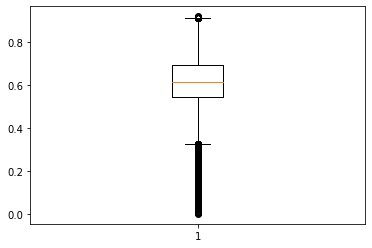

In [36]:
plt.boxplot(proba[(proba['diff'] == 1)]['proba'].values);

In [37]:
y

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [38]:
def calc_score(df, max_depth=25, n_estimators=86, min_samples_leaf=10, min_samples_split=270, random_state=21): 
    X  = pd.get_dummies(df.drop('TARGET', axis=1), drop_first=True).values
    X = StandardScaler().fit_transform(X)
    y = df['TARGET'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=random_state)
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                max_depth=max_depth, 
                                class_weight='balanced_subsample', 
                                n_jobs=-1,
                                random_state=random_state, 
                                min_samples_leaf=min_samples_leaf, 
                                min_samples_split=min_samples_split)
    rf.fit(X_train, y_train)
    return roc_auc_score(y_test, rf.predict(X_test)) 

In [39]:
def drop_feature():
    max_auc = 0.0
    features = list(df.drop(not_imp, axis=1).drop('TARGET', axis=1).columns)
    while len(features) > 1:
        i = features.pop()   
        curr_auc = calc_score(df.drop(not_imp + [i],  axis=1))   
        if curr_auc > max_auc:
            print('drop', i, round(curr_auc, 4))
            max_auc = curr_auc
            worst_feature = i
    return worst_feature, max_auc

In [40]:
def add_feature():
    max_auc = 0.0
    features = not_imp.copy()
    while len(features) > 1:
        i = features.pop()   
        curr_auc = calc_score(df.drop(list(set(not_imp) - set(i)),  axis=1))   
        if curr_auc > max_auc:
            print('add', i, round(curr_auc, 4))
            max_auc = curr_auc
            best_feature = i
    return best_feature, max_auc

In [41]:
calc_score(df)

0.7441638132119195

In [ ]:
%%time
scores = []
features = []
while (len(df.columns)) > 3:
    worst, drop_score = drop_feature()
    best, add_score = add_feature()    
    if drop_score >  add_score or (len(features) > 2 and features[-1] == features[-2]):
        scores.append(drop_score)
        not_imp.append(worst)
        #features.append(worst)
        print('------------------------')
        print('delete', worst, drop_score)
        print('------------------------')
    else:
        scores.append(drop_score)
        not_imp.remove(best)
        features.append(best)
        print('------------------------')
        print('append', best, add_score)
        print('------------------------')

drop LDEAL_ACT_DAYS_PCT_TR4 0.7569
drop TURNOVER_DYNAMIC_CC_3M 0.7574
drop AVG_PCT_DEBT_TO_DEAL_AMT 0.7582
drop TURNOVER_CC 0.7583
drop CNT_TRAN_CLO_TENDENCY1M 0.7586
add SUM_TRAN_SUP_TENDENCY1M 0.7596
------------------------
append SUM_TRAN_SUP_TENDENCY1M 0.7596243228609848
------------------------
drop LDEAL_ACT_DAYS_PCT_TR4 0.7583
drop AVG_PCT_DEBT_TO_DEAL_AMT 0.7594
drop SUM_TRAN_SUP_TENDENCY1M 0.7596
drop CNT_TRAN_CLO_TENDENCY3M 0.7607
add APP_DRIVING_LICENSE 0.7607
------------------------
append APP_DRIVING_LICENSE 0.7606813306893297
------------------------
drop LDEAL_ACT_DAYS_PCT_TR4 0.7578
drop TURNOVER_DYNAMIC_CC_3M 0.7582
drop CNT_TRAN_CLO_TENDENCY3M 0.7583
drop SUM_TRAN_MED_TENDENCY1M 0.7592
drop APP_DRIVING_LICENSE 0.7607
add REST_DYNAMIC_CC_3M 0.7584
------------------------
delete APP_DRIVING_LICENSE 0.7606813306893297
------------------------
drop LDEAL_ACT_DAYS_PCT_TR4 0.7583
drop AVG_PCT_DEBT_TO_DEAL_AMT 0.7594
drop SUM_TRAN_SUP_TENDENCY1M 0.7596
drop CNT_TRAN_CLO_T

In [ ]:
pd.DataFrame(scores, features).plot(figsize=(15,5))

In [ ]:
df_scores = pd.DataFrame(scores, important, columns={"scores"} )
df_scores.plot(figsize=(15,5), rot=90);

In [ ]:
df

df.drop(not_imp,  axis=1).drop('TARGET', axis=1)

In [ ]:
curr_auc

In [ ]:
df_scores.sort_values("scores")

In [ ]:
not_important

In [ ]:
scores

In [ ]:
set(['LDEAL_GRACE_DAYS_PCT_MED',
 'REST_DYNAMIC_FDEP_3M',
 'AMOUNT_RUB_NAS_PRC',
 'AMOUNT_RUB_NAS_PRC'])

In [ ]:
%%time
estimator = RandomForestClassifier(verbose=True)
selector = RFE(estimator, n_features_to_select=10)
selector.fit(X_train, y_train)
roc_auc_score(y_test, selector.predict(X_test))

In [ ]:
corr[(corr['value'] > 0.5)]

In [ ]:
coef = pd.DataFrame()
coef["feature"] = df.drop("TARGET", axis=1).columns
coef["rf_coef"] = np.abs(rf.feature_importances_)
#coef["lasso_coef"] = np.abs(lasso.coef_)

#coef['ridge'] = np.abs(ridge.coef_)
#coef['xgb_coef'] = np.abs(xgb_clf.feature_importances_)
#coef['ranking'] = selector.ranking_
#coef['support'] = selector.support_
coef.sort_values("rf_coef", ascending=False, inplace=True)
#coef[(coef["rf_coef"] > 0.01) | (coef["xgb_coef"] > 0)]
coef

In [ ]:
coef = pd.DataFrame()
coef["feature"] = df.drop("TARGET", axis=1).columns
coef["rf_coef"] = np.abs(grid.feature_importances_)
#coef["lasso_coef"] = np.abs(lasso.coef_)

#coef['ridge'] = np.abs(ridge.coef_)
#coef['xgb_coef'] = np.abs(xgb_clf.feature_importances_)
#coef['ranking'] = selector.ranking_
#coef['support'] = selector.support_
coef.sort_values("rf_coef", ascending=False, inplace=True)
#coef[(coef["rf_coef"] > 0.01) | (coef["xgb_coef"] > 0)]
coef

In [ ]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

pip install seglearn